<a href="https://colab.research.google.com/github/anastasiiaCher/python-for-DPaV/blob/main/labs/%D0%9B%D0%A04_%D0%A0%D0%B5%D0%BA%D0%BE%D0%BC%D0%B5%D0%BD%D0%B4%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 4. Рекомендательные системы
**Выполнил: студент 4 курса, группы ПИЖ-б-о-22-1, Джараян Арег Александрович
**

# Постановка задачи


**Цель работы:** применение идей коллаборативной фильтрации и фильтрации, основанной на контенте, для формирования рекомендаций фильмов пользователям.

**Краткое описание:** в лабораторной работе необходимо выполнить 3 задания на исследование данных о фильмах с сайта [MovieLens](http://movielens.org) и применение двух подходов к построению рекомендаций фильмов – на основе предпочтений похожих пользователей и на основе предпочтений пользователя, для которого генерируется рекомендация.

#  Данные


Набор данных `ml-25m` включает в себя описание 5-звёздного рейтинга фильмов с сайта [MovieLens](http://movielens.org) – одного из старейших сервисов по рекомендации фильмов. Набор данных содержит 25 000 095 оценок и 1 093 360 применений тегов к 62 423 фильмам. Эти данные были созданы 162 541 пользователями в период с 9 января 1995 года по 21 ноября 2019 года – именно в этот день был сгенерирован датасет.

Пользователи были выбраны случайным образом при условии, что пользователь оценил как минимум 20 фильмов. Демографическая информация в набор данных не включена. Каждый пользователь представлен только `id`.

В папке [Data/lab4](https://drive.google.com/drive/folders/1tHu5zzSTF_ZB9OfeaWvM4cWwGM2q99b8?usp=sharing) расположено несколько таблиц с характеристиками фильмов. Также эти данные доступны для скачивания [по ссылке](https://grouplens.org/datasets/movielens/25m/) (как и другие наборы данных от GroupLens). Все задания лабораторной работы необходимо выполнять по этим данным.

Данные включают в себя файлы: `genome-scores.csv`, `genome-tags.csv`, `links.csv`, `movies.csv`, `ratings.csv` и `tags.csv`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
sns.set_context("notebook")

In [ ]:
# загрузка данных из папки Data/lab4
!gdown 1KjMiVB0j5B6yF5vnwLGYcThQaPkPx0tH
!gdown 1uWeLWEkkd_GX8HoMVxpRXdSg7BgfSCdR
!gdown 1xcv1ZY8bwi-AkqZGs5_f8kIPXWHa8Q1W
!gdown 1ahac-9nULw9C1aS7pxh05RTtSlbxJxlS
!gdown 1bYRHTZJ1eZ5T2IugHxsDwrc4xuaWB-A9
!gdown 1XaxxydOXE5zdhhehv-Wig99CuJmg0B_w

Downloading...
From (original): https://drive.google.com/uc?id=1KjMiVB0j5B6yF5vnwLGYcThQaPkPx0tH
From (redirected): https://drive.google.com/uc?id=1KjMiVB0j5B6yF5vnwLGYcThQaPkPx0tH&confirm=t&uuid=b4bb6207-7246-4464-8722-5831dd2b7d63
To: /content/genome-scores.csv
100% 435M/435M [00:04<00:00, 88.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uWeLWEkkd_GX8HoMVxpRXdSg7BgfSCdR
To: /content/genome-tags.csv
100% 18.1k/18.1k [00:00<00:00, 42.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xcv1ZY8bwi-AkqZGs5_f8kIPXWHa8Q1W
To: /content/links.csv
100% 1.37M/1.37M [00:00<00:00, 151MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ahac-9nULw9C1aS7pxh05RTtSlbxJxlS
To: /content/movies.csv
100% 3.04M/3.04M [00:00<00:00, 149MB/s]
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.



### Таблица ```tags.csv```
##### **Описание**
Таблица содержит все теги фильмов. Теги - это сгенерированные пользователями метаданные о фильмах. Каждый тег обычно представляет собой слово или коротку фразу. Значение, ценность и цель каждого тега определяется каждым пользователем.


##### **Формат данных**


```
userId,movieId,tag,timestamp
3,260,classic,1439472355
3,260,sci-fi,1439472256
4,1732,dark,comedy,1573943598
...
```
##### **Описание полей**

 - ``` userId``` — идентификатор пользователя;
 - ``` movieId``` — идентификатор фильма;
 - ``` tag``` — название тега;
 - ``` timestamp``` — количество секунд, прошедших с 1 января 1970.


In [ ]:
# создание датафрейма тегов
tag=pd.read_csv('tags.csv')
tag.sample(3)

,userId,movieId,tag,timestamp
686208,86459,1203,courtroom,1489622137
584406,66865,102033,kidnapping,1381431066
718594,94239,1929,aspiring actress,1535404616


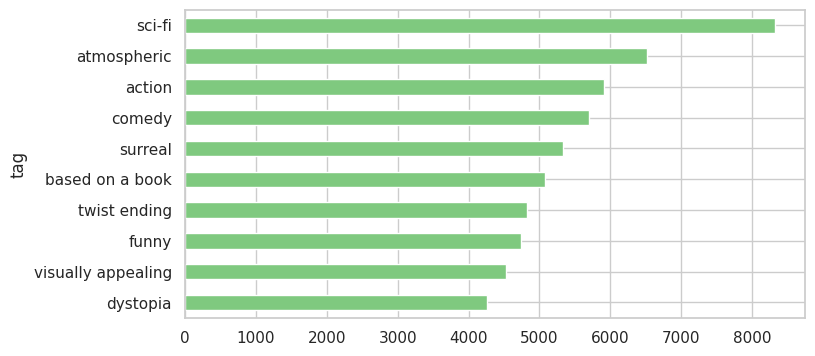

In [ ]:
tag_counts = tag['tag'].value_counts()
tag_counts[:10].sort_values().plot(kind='barh', figsize=(8,4), colormap="Accent");

### Таблица ```ratings.csv```
##### **Описание**
В таблице представлены оценки пользователей за фильмы. Рейтинги предствляют собой школу из 5 звезд с использованием половинки звезды (от 0.5 звёзд до 5.0 звёзд).

##### **Формат данных**

```
userId,movieId,rating,timestamp
1,296,5.0,1147880044
1,306,3.5,1147868817
1,307,5.0,1147868828
...
```
##### **Описание полей**

 - ``` userId``` — идентификатор пользователя;
 - ``` movieId``` — идентификатор фильма;
 - ``` rating``` — оценка, которую пользователь поставил фильму;
 - ``` timestamp``` — количество секунд, прошедших с 1 января 1970..

Строки упорядочены по `userId`, а затем по `movieId`.

In [ ]:
# загрузка данных о рейтингах
rating=pd.read_csv('ratings.csv')
rating.sample(3)

,userId,movieId,rating,timestamp
298171,2058,1136,5.0,1.142869e+09
7647307,49619,7364,3.5,1.103844e+09
6927724,44954,57669,3.5,1.239546e+09


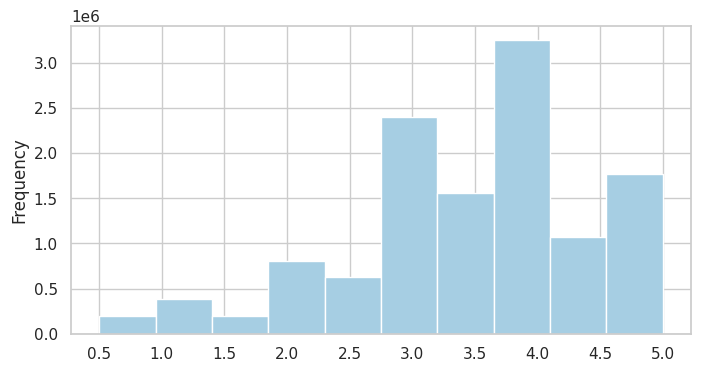

In [ ]:
# гистограмма рейтингов
rating["rating"].plot(kind='hist', figsize=(8,4), colormap="Paired", xticks=np.arange(0.5,5.5,0.5));

### Таблица ```movies.csv```
##### **Описание**
Таблица содержит информацию о фильмах. Каждая строка представляет информацию об одном фильме. Названия фильмов вводились вручную или были импортированы с сайта <https://www.themoviedb.org/>.


##### **Формат данных**

```
movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
...
```
##### **Описание полей**

 - ``` movieId``` — идентификатор фильма;
 - ``` title``` — название фильма и год выпуска в скобках после названия;
 - ``` genres``` — список жанров фильма, все жанры записываются в одном поле через разделитель `|`.


Допустимые жанры | $ $
--- | ---
1. Action | 11. Horror
2. Adventure | 12. Musical
3. Animation | 13. Mystery
4. Children's | 14. Romance
5. Comedy | 15. Sci-Fi
6. Crime | 16. Thriller
7. Documentary | 17. War
8. Drama | 18. Western
9. Fantasy | 19. (no genres listed)
10. Film-Noir |  











### Таблица ```genome-tags.csv```
##### **Описание**

[genome-paper]: http://files.grouplens.org/papers/tag_genome.pdf

Tag genome – это структура данных, которая описывает релевантность тегов по отношению к фильму. Заданы 1128 тэгов, и по каждому фильму указаны значения релевантности для каждого тега.

Описание [в статье][genome-paper]. Tag genome был рассчитан с помощью алгоритма на основе пользовательского контента, включая теги, рейтинги и текстовые описания.

Таблица содержит описания тегов.


##### **Формат данных**

```
tagId,tag
2,007 (series)
4,1920s
11,3d
22,adapted from:book
...
```
##### **Описание полей**

 - ``` tagId``` — идентификатор тега, значения сгенерированы в тот момент, когда экспортировался весь набор данных, так что могут быть не такими, как в других версиях датасетов от MovieLens (например, 1М и 20M).;
 - ``` tag``` — название тега.


### Таблица ```genome-scores.csv```
##### **Описание**
Таблица содержит релевантность тегов по отношению к фильмам.

##### **Формат данных**

```
movieId,tagId,relevance
1,3,0.0625
1,5,0.14075
1,8,0.20375
...
```
##### **Описание полей**

 - ``` movieId``` — идентификатор фильма;
 - ``` tagId``` — идентификатор тега;
 - ``` relevance``` — релевантность тега фильму.


In [ ]:
# загрузка данных о фильмах и tag genome
movies = pd.read_csv("movies.csv")
genome_scores = pd.read_csv('genome-scores.csv')
genome_tag = pd.read_csv('genome-tags.csv')

In [ ]:
# релевантность каждого тега фильму Demolition Man (1993)
genome_scores[genome_scores.movieId == 442]

,movieId,tagId,relevance
474888,442,1,0.04525
474889,442,2,0.04575
474890,442,3,0.03475
474891,442,4,0.04700
474892,442,5,0.06375
...,...,...,...
476011,442,1124,0.04400
476012,442,1125,0.03250
476013,442,1126,0.00800
476014,442,1127,0.11775


In [ ]:
# выведем 5 фильмов с самой высокой релевантностью тега "dragon"
genome_tag[genome_tag.tag == 'dragon']

,tagId,tag
320,321,dragon


In [ ]:
top5_dragon_genom = genome_scores.query("tagId == 321").nlargest(5, "relevance")
movies[movies.movieId.isin(top5_dragon_genom.movieId)]

,movieId,title,genres
642,653,Dragonheart (1996),Action|Adventure|Fantasy
4933,5039,Dragonslayer (1981),Action|Adventure|Fantasy
14477,76093,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX
20603,106489,"Hobbit: The Desolation of Smaug, The (2013)",Adventure|Fantasy|IMAX
21757,112175,How to Train Your Dragon 2 (2014),Action|Adventure|Animation


### Таблица ```links.csv```
##### **Описание**
Таблица содержит идентификаторы фильмов с других ресурсов. В каждой строке находятся ссылки на один фильм.

##### **Формат данных**

```
movieId,imdbId,tmdbId
1,114709,862
2,113497,8844
3,113228,15602
...
```
##### **Описание полей**

 - ``` movieId``` — идентификатор фильма на <https://movielens.org>. Например, фильм "Toy Story" имеет ссылку <https://movielens.org/movies/1>;
 - ``` imdbId``` — идентификатор фильма на <http://www.imdb.com>. Например, фильм Toy Story имеет ссылку <http://www.imdb.com/title/tt0114709/>;
 - ``` tmdbId``` — идентификатор фильма на <https://www.themoviedb.org>. Например, фильм Toy Story имеет ссылку <https://www.themoviedb.org/movie/862>.


# Понимание данных

В таблице `movies.csv` представление жанров не очень хорошее: не очень понятно, что с ними можно делать. Очень часто для подобных данных используется следующий подход: под каждый жанр создается новый столбец, в соответствующем жанру столбце у фильма записывается 1, если в перечне был такой жанр, и 0 – если не было. Этот подход чем-то похож на one-hot encoding.

Вторая проблема с данными – наличие в столбце `title` года выпуска фильма. Лучше всего под год выпуска выделить отдельный столбец.

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# объединим таблицы с описаниями фильмов и их рейтингами в одну
data = pd.merge(movies,rating)

# первые 5 строк объединенной таблицы
display(data.head())

# 5 случайных строк из объединенной таблица
data.sample(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1.439472e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1.573944e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,8.586259e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,8.904925e+08


,movieId,title,genres,userId,rating,timestamp
4877522,2080,Lady and the Tramp (1955),Animation|Children|Comedy|Romance,7105,4.0,1.103565e+09
5086497,2236,Simon Birch (1998),Drama,73266,4.0,9.745122e+08
2785993,1079,"Fish Called Wanda, A (1988)",Comedy|Crime,45819,5.0,9.565809e+08
5854650,2736,Brighton Beach Memoirs (1986),Comedy,7895,4.0,9.502221e+08
3775321,1358,Sling Blade (1996),Drama,41149,5.0,9.475532e+08


In [ ]:
# в таблице number_rating будет храниться общее количество оценок фильму
number_rating = data.groupby('title')['rating'].count().rename("rated_by_users").reset_index()
number_rating.head()

,title,rated_by_users
0,"""Great Performances"" Cats (1998)",5
1,$5 a Day (2008),2
2,$9.99 (2008),1
3,'71 (2014),4
4,'Hellboy': The Seeds of Creation (2004),2


In [ ]:
# т.к. обработка всей таблицы с рейтингами фильмов от пользователей
# перегружает оперативную память, для примера возьмем случайные 10К строк из нее

data_train = data.sample(10000)
data_train.head()

,movieId,title,genres,userId,rating,timestamp
129543,1954,Rocky (1976),Drama,1428,4.0,1542420396
16490,164,Devil in a Blue Dress (1995),Crime|Film-Noir|Mystery|Thriller,1624,3.0,831056074
157650,2616,Dick Tracy (1990),Action|Crime,80,4.0,993230720
298251,81591,Black Swan (2010),Drama|Thriller,1484,2.5,1498652457
326618,160271,Central Intelligence (2016),Action|Comedy,406,4.5,1477190089


In [ ]:
# составим сводную таблицу рейтингов, который каждый пользователь ставил каждому фильму
movie_pivot = data_train.pivot_table(index=["userId"],
                                     columns=["title"],
                                     values="rating")
movie_pivot.head().T

userId,1,2,3,4,5
title,,,,,
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN
10 Cloverfield Lane (2016),NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN
"10,000 BC (2008)",NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,NaN


Матрица предпочтений состоит практически из одних нулей.

В такой матрице маловероятно найти хоть что-то. Например, поищем похожий фильм.

In [ ]:
watched_movie = movie_pivot['10 Things I Hate About You (1999)']

similar_movies = movie_pivot.corrwith(watched_movie)
similar_movies = similar_movies.sort_values(ascending=False)
similar_movies.head()

,0
title,
10 Things I Hate About You (1999),1.0
Peter Pan (1953),1.0
Reservoir Dogs (1992),1.0
(500) Days of Summer (2009),NaN
10 Cloverfield Lane (2016),NaN


Судя по результату, фильм похож только сам на себя.

# Практические задания

## Задание 1

Выход из этой ситуации с неудачным поиском похожих фильмов такой.

Будем делать рекомендации не всем и сразу, а конкретному пользователю. Формировать `movie_pivot` будем только для этого конкретного пользователя.

1. Возьмём все оценки, которые поставил пользователь $U$
2. По фильмам $M_U$, которые он оценил, получим всех пользователей, которые ставили этим фильмам оценки
3. Скорее всего, на этом этапе список получится большим (для случайного пользователя может получиться около 2 миллионов строк). Например, оставить только пользователей, у которых много общих фильмов.
4. Для каждого пользователя посчитаем похожесть (например, корреляцию).
5. Отсортируем пользователей по похожести.
6. Оставим только $k$ самых похожих пользователей.

### Пример решения

Выбираем случайного пользователя.

In [ ]:
all_users = rating['userId'].value_counts()
user = all_users.sample(1).index
user

Index([1727], dtype='int64', name='userId')

Получаем фильмы, которые пользователь посмотрел.

In [ ]:
user_movies = data[data.userId == user[0]]
user_movies = user_movies.drop(['genres', 'timestamp', 'userId'], axis = 1)
user_movies.head()

,movieId,title,rating
594,1,Toy Story (1995),3.0
2321,10,GoldenEye (1995),4.0
3664,19,Ace Ventura: When Nature Calls (1995),4.0
4251,23,Assassins (1995),4.0
8639,50,"Usual Suspects, The (1995)",5.0


Теперь найдем пользователей, которые смотрели эти фильмы.

In [ ]:
new_data = data[data.movieId.isin(user_movies.movieId)]
new_data = new_data.drop(['genres', 'timestamp'], axis = 1)
new_data.sample(10)

,movieId,title,userId,rating
205395,4270,"Mummy Returns, The (2001)",1866,2.0
91274,1214,Alien (1979),20,5.0
63168,741,Ghost in the Shell (Kôkaku kidôtai) (1995),410,4.0
167061,2826,"13th Warrior, The (1999)",912,4.5
127223,1907,Mulan (1998),2083,3.0
155049,2542,"Lock, Stock & Two Smoking Barrels (1998)",1480,2.0
165017,2763,"Thomas Crown Affair, The (1999)",178,4.0
54275,589,Terminator 2: Judgment Day (1991),1413,5.0
115644,1580,Men in Black (a.k.a. MIB) (1997),1401,3.0
117468,1610,"Hunt for Red October, The (1990)",1743,5.0


Как по `ID` пользователя получить список его фильмов:

In [ ]:
users_group = new_data.groupby(['userId'])
users_group.get_group(user[0]).head()

,movieId,title,userId,rating
594,1,Toy Story (1995),1727,3.0
2321,10,GoldenEye (1995),1727,4.0
3664,19,Ace Ventura: When Nature Calls (1995),1727,4.0
4251,23,Assassins (1995),1727,4.0
8639,50,"Usual Suspects, The (1995)",1727,5.0


In [ ]:
user[0]

np.int64(1727)

In [ ]:
# выведем фильмы трех пользователей, оценивших больше всего фильмов в выборке
sorted_users_group = sorted(users_group,  key=lambda x: len(x[1]), reverse=True)
for user_movies_group in sorted_users_group[:3]:
  display(user_movies_group[1])

,movieId,title,userId,rating
594,1,Toy Story (1995),1727,3.0
2321,10,GoldenEye (1995),1727,4.0
3664,19,Ace Ventura: When Nature Calls (1995),1727,4.0
4251,23,Assassins (1995),1727,4.0
8639,50,"Usual Suspects, The (1995)",1727,5.0
...,...,...,...,...
207148,4343,Evolution (2001),1727,3.0
207661,4367,Lara Croft: Tomb Raider (2001),1727,4.0
209370,4519,"Land Before Time, The (1988)",1727,2.0
210325,4640,Brother (2000),1727,5.0


,movieId,title,userId,rating
754,1,Toy Story (1995),2177,4.0
2391,10,GoldenEye (1995),2177,4.0
3722,19,Ace Ventura: When Nature Calls (1995),2177,3.0
4265,23,Assassins (1995),2177,4.0
8794,50,"Usual Suspects, The (1995)",2177,4.0
...,...,...,...,...
206317,4306,Shrek (2001),2177,3.0
206682,4310,Pearl Harbor (2001),2177,4.0
207164,4343,Evolution (2001),2177,3.0
207692,4367,Lara Croft: Tomb Raider (2001),2177,3.5


,movieId,title,userId,rating
603,1,Toy Story (1995),1748,4.5
2326,10,GoldenEye (1995),1748,4.5
3667,19,Ace Ventura: When Nature Calls (1995),1748,2.5
4254,23,Assassins (1995),1748,2.5
8645,50,"Usual Suspects, The (1995)",1748,4.5
...,...,...,...,...
206650,4310,Pearl Harbor (2001),1748,3.5
207150,4343,Evolution (2001),1748,3.0
207664,4367,Lara Croft: Tomb Raider (2001),1748,4.0
210326,4640,Brother (2000),1748,1.0


Выведем `ID` пользователя, у которого больше всего похожих фильмов.

In [ ]:
similar_movies_user = sorted_users_group[1][0] # скорее всего, в sorted_users_group[0][0] сидит сам пользователь

In [ ]:
person2 = users_group.get_group(similar_movies_user).sort_values(by='movieId')

Получим список одинаковых фильмов для двух пользователей с оценками.

In [ ]:
temp = user_movies[user_movies['movieId'].isin(users_group.get_group(similar_movies_user)['movieId'])]
person1 = temp.sort_values(by='movieId')

Посчитаем коэффициент корреляции Пирсона для этих двух пользователей


In [ ]:
from scipy.stats import pearsonr
pearsonr(person1.rating, person2.rating)[0]

np.float64(0.20717973686443952)

**Дальше нужно дописать самостоятельно.** Нужно пройтись по всем пользователям и отсортировать их по похожести и оставить $k$ самых похожих.

> Далее в коде приведены примеры расчетов для случайных пользователей. Их нужно заменить своими.

In [ ]:
# Решение для Задания 1

# Получаем всех пользователей, у которых есть общие фильмы с целевым пользователем
users = list(users_group.groups.keys())
# Убираем целевого пользователя из списка
users = [u for u in users if u != user[0]]
# Ограничиваем количество пользователей для скорости вычислений
users = users[:100]  # можно увеличить до 500 или 1000 при необходимости

pearsonCorDict = {}

for u in users:
    try:
        # Получаем фильмы пользователя u
        person2 = users_group.get_group(u).sort_values(by='movieId')

        # Находим общие фильмы между целевым пользователем и пользователем u
        common_movies = user_movies[user_movies['movieId'].isin(person2['movieId'])]

        # Если общих фильмов меньше 3, пропускаем (слишком мало данных для корреляции)
        if len(common_movies) < 3:
            continue

        # Сортируем общие фильмы по movieId для корректного сопоставления
        person1_common = common_movies.sort_values(by='movieId')
        person2_common = person2[person2['movieId'].isin(common_movies['movieId'])].sort_values(by='movieId')

        # Убеждаемся, что порядок фильмов одинаковый
        if len(person1_common) == len(person2_common):
            # Вычисляем корреляцию Пирсона
            correlation, _ = pearsonr(person1_common['rating'].values, person2_common['rating'].values)

            # Сохраняем только значимые корреляции (не NaN и не слишком низкие)
            if not np.isnan(correlation) and abs(correlation) > 0.1:
                pearsonCorDict[u] = correlation
    except Exception as e:
        # Пропускаем пользователей, для которых возникают ошибки
        continue

In [ ]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,0.225298,2
1,0.515369,3
2,0.341515,5
3,-0.816497,7
4,0.230447,8


In [ ]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[:7]
topUsers

,similarityIndex,userId
59,1.000000,103
15,0.979937,26
29,0.910705,56
34,0.866025,64
40,0.866025,73
51,0.816497,88
5,0.695701,10


Теперь у нас есть похожие пользователи. Получим оценки, которые они ставили за все фильмы.

In [ ]:
topUsersRating=topUsers.merge(data, left_on='userId', right_on='userId', how='inner')
topUsersRating.sample(10)

,similarityIndex,userId,movieId,title,genres,rating,timestamp
155,0.866025,73,6,Heat (1995),Action|Crime|Thriller,5.0,857829799
201,0.816497,88,2393,Star Trek: Insurrection (1998),Action|Drama|Romance|Sci-Fi,3.5,1397607199
70,0.979937,26,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,5.0,1280515647
142,0.866025,64,98809,"Hobbit: An Unexpected Journey, The (2012)",Adventure|Fantasy|IMAX,3.0,1434644667
100,0.910705,56,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,2.0,1166775596
255,0.695701,10,5049,48 Hrs. (1982),Action|Comedy|Crime|Drama,4.0,1227571186
187,0.866025,73,842,Tales from the Crypt Presents: Bordello of Blo...,Comedy|Horror,3.0,857830114
263,0.695701,10,8810,AVP: Alien vs. Predator (2004),Action|Horror|Sci-Fi|Thriller,3.5,1227571232
212,0.816497,88,4734,Jay and Silent Bob Strike Back (2001),Adventure|Comedy,4.0,1397607284
84,0.910705,56,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,4.5,1186453582


Уберем лишние столбцы и получим взвешенную оценку за фильм.

In [ ]:
topUsersRating = topUsersRating.drop(['genres', 'timestamp'], axis = 1)
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,title,rating,weightedRating
0,1.0,103,6,Heat (1995),3.0,3.0
1,1.0,103,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),5.0,5.0
2,1.0,103,95,Broken Arrow (1996),3.0,3.0
3,1.0,103,110,Braveheart (1995),5.0,5.0
4,1.0,103,150,Apollo 13 (1995),5.0,5.0


Теперь нужно сгруппировать по фильмам и получить сумму взвешенных оценок.

In [ ]:
tempTopUsersRating = topUsersRating.groupby(['movieId', 'title']).agg({
    'rating': 'mean',  # средний рейтинг фильма
    'similarityIndex': 'sum'  # сумма коэффициентов схожести пользователей, которые оценили этот фильм
}).reset_index()

# Вычисляем взвешенную оценку для каждого фильма
tempTopUsersRating['weighted_rating'] = tempTopUsersRating['rating'] * tempTopUsersRating['similarityIndex']

# Сортируем по взвешенной оценке в порядке убывания
tempTopUsersRating = tempTopUsersRating.sort_values('weighted_rating', ascending=False)

tempTopUsersRating.head()

,movieId,title,rating,similarityIndex,weighted_rating
29,260,Star Wars: Episode IV - A New Hope (1977),4.400,4.318394,19.000932
5,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),4.625,3.541663,16.380192
18,110,Braveheart (1995),4.250,3.586343,15.241957
93,1210,Star Wars: Episode VI - Return of the Jedi (1983),4.250,3.452368,14.672565
61,593,"Silence of the Lambs, The (1991)",4.000,3.586343,14.345372


Теперь можно получить рекомендацию.

In [ ]:
# Если использовали первый вариант с простой группировкой
recommendation_df = pd.DataFrame()

# Используем правильные названия колонок из tempTopUsersRating
recommendation_df['score'] = tempTopUsersRating['weighted_rating'] / tempTopUsersRating['similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating['movieId']
recommendation_df['title'] = tempTopUsersRating['title']
recommendation_df = recommendation_df.sort_values(by='score', ascending=False)
recommendation_df

,score,movieId,title
121,5.0,2571,"Matrix, The (1999)"
46,5.0,431,Carlito's Way (1993)
68,5.0,720,Wallace & Gromit: The Best of Aardman Animatio...
45,5.0,426,Body Snatchers (1993)
99,5.0,1580,Men in Black (a.k.a. MIB) (1997)
...,...,...,...
72,1.0,762,Striptease (1996)
26,1.0,193,Showgirls (1995)
168,1.0,7444,13 Going on 30 (2004)
98,0.5,1517,Austin Powers: International Man of Mystery (1...


In [ ]:
# найдем количество рекомендаций с рейтингом выше 4.5
recommendation_df = recommendation_df[recommendation_df.score > 4.5]
recommendation_df = recommendation_df.drop(['movieId'], axis = 1)
recommendation_df.shape

(32, 2)

In [ ]:
# Сначала посмотрим на структуру recommendation_df
print("Структура recommendation_df:")
print(recommendation_df.columns.tolist())
print("\nПервые строки recommendation_df:")
print(recommendation_df.head())

# Теперь исправим объединение
# Если в recommendation_df есть колонка 'movieId', используем её
if 'movieId' in recommendation_df.columns:
    recommended_movies = recommendation_df.merge(movies, how='inner', on='movieId')
else:
    # Если нет, попробуем другие варианты
    print("\nКолонка 'movieId' не найдена в recommendation_df")
    print("Попытка найти альтернативные колонки для объединения...")

    # Проверим, есть ли другие колонки для объединения
    common_columns = set(recommendation_df.columns) & set(movies.columns)
    print(f"Общие колонки: {common_columns}")

    if 'title' in common_columns:
        recommended_movies = recommendation_df.merge(movies, how='inner', on='title')
    else:
        # Если ничего не найдено, создаем колонку movieId
        print("Создаем колонку movieId из индекса...")
        recommendation_df = recommendation_df.reset_index()
        if 'movieId' in recommendation_df.columns:
            recommended_movies = recommendation_df.merge(movies, how='inner', on='movieId')
        else:
            print("Не удалось найти подходящую колонку для объединения")

recommended_movies.head()

Структура recommendation_df:
['score', 'title']

Первые строки recommendation_df:
     score                                              title
121    5.0                                 Matrix, The (1999)
46     5.0                               Carlito's Way (1993)
68     5.0  Wallace & Gromit: The Best of Aardman Animatio...
45     5.0                              Body Snatchers (1993)
99     5.0                   Men in Black (a.k.a. MIB) (1997)

Колонка 'movieId' не найдена в recommendation_df
Попытка найти альтернативные колонки для объединения...
Общие колонки: {'title'}


,score,title,movieId,genres
0,5.0,"Matrix, The (1999)",2571,Action|Sci-Fi|Thriller
1,5.0,Carlito's Way (1993),431,Crime|Drama
2,5.0,Wallace & Gromit: The Best of Aardman Animatio...,720,Adventure|Animation|Comedy
3,5.0,Body Snatchers (1993),426,Horror|Sci-Fi|Thriller
4,5.0,Men in Black (a.k.a. MIB) (1997),1580,Action|Comedy|Sci-Fi


Результат есть. Но теперь нужно оценить качество этой рекомендации.

**Задача следующая:** разделить исходные данные на `train` и `test`. Получить предсказания на `train` и проверить их на `test`.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Задание 1.5: Разделение на train/test и оценка качества

# 1. Разделяем данные на обучающую и тестовую выборки
def split_ratings_data(rating, test_size=0.2, random_state=42):
    """
    Разделяет данные о рейтингах на train и test
    """
    # Сортируем по времени для временного разделения (более реалистично)
    rating_sorted = rating.sort_values('timestamp')

    # Разделяем данные
    train_data, test_data = train_test_split(
        rating_sorted,
        test_size=test_size,
        random_state=random_state,
        stratify=rating_sorted['userId']  # стратификация по пользователям
    )

    return train_data, test_data

# Разделяем данные
train_data, test_data = split_ratings_data(rating)
print(f"Размер train: {len(train_data)}")
print(f"Размер test: {len(test_data)}")

# 2. Функция для получения предсказаний на основе нашей системы рекомендаций
def predict_ratings(user_id, movie_ids, train_data, n_similar_users=10):
    """
    Предсказывает рейтинги для заданных фильмов для конкретного пользователя
    """
    predictions = {}

    # Получаем данные пользователя из train
    user_movies_train = train_data[train_data['userId'] == user_id]

    if len(user_movies_train) == 0:
        # Если пользователя нет в train, возвращаем средний рейтинг по всем фильмам
        avg_rating = train_data['rating'].mean()
        return {movie_id: avg_rating for movie_id in movie_ids}

    # Находим похожих пользователей (упрощенная версия нашего алгоритма)
    similar_users = find_similar_users(user_id, train_data, n_similar_users)

    for movie_id in movie_ids:
        # Если пользователь уже оценил этот фильм в train, используем его оценку
        user_rating = user_movies_train[user_movies_train['movieId'] == movie_id]['rating']
        if len(user_rating) > 0:
            predictions[movie_id] = user_rating.iloc[0]
            continue

        # Иначе предсказываем на основе похожих пользователей
        movie_ratings = []
        weights = []

        for similar_user_id, similarity in similar_users.items():
            similar_user_rating = train_data[
                (train_data['userId'] == similar_user_id) &
                (train_data['movieId'] == movie_id)
            ]['rating']

            if len(similar_user_rating) > 0:
                movie_ratings.append(similar_user_rating.iloc[0])
                weights.append(similarity)

        if movie_ratings:
            # Взвешенное среднее на основе схожести
            weighted_avg = np.average(movie_ratings, weights=weights)
            predictions[movie_id] = weighted_avg
        else:
            # Если никто из похожих пользователей не оценил фильм
            predictions[movie_id] = train_data['rating'].mean()

    return predictions

# 3. Упрощенная функция для поиска похожих пользователей
def find_similar_users(target_user_id, train_data, n_similar_users=10):
    """
    Упрощенная версия поиска похожих пользователей для оценки качества
    """
    similar_users = {}

    # Получаем фильмы целевого пользователя
    target_user_movies = train_data[train_data['userId'] == target_user_id]

    if len(target_user_movies) == 0:
        return similar_users

    # Находим пользователей с общими фильмами
    common_users_data = train_data[
        train_data['movieId'].isin(target_user_movies['movieId']) &
        (train_data['userId'] != target_user_id)
    ]

    users_with_common_movies = common_users_data['userId'].unique()

    for user_id in users_with_common_movies[:100]:  # ограничиваем для скорости
        user_movies = train_data[train_data['userId'] == user_id]

        # Находим общие фильмы
        common_movies = pd.merge(
            target_user_movies,
            user_movies,
            on='movieId',
            suffixes=('_target', '_other')
        )

        if len(common_movies) >= 3:
            try:
                corr, _ = pearsonr(
                    common_movies['rating_target'],
                    common_movies['rating_other']
                )
                if not np.isnan(corr) and abs(corr) > 0.1:
                    similar_users[user_id] = corr
            except:
                continue

    # Возвращаем топ-N похожих пользователей
    return dict(sorted(similar_users.items(), key=lambda x: x[1], reverse=True)[:n_similar_users])

# 4. Оценка качества на тестовой выборке
def evaluate_recommendation_system(train_data, test_data, n_test_users=50):
    """
    Оценивает качество системы рекомендаций на тестовой выборке
    """
    # Выбираем случайных пользователей из test для оценки
    test_users = test_data['userId'].unique()[:n_test_users]

    all_predictions = []
    all_actual = []

    for user_id in test_users:
        # Получаем фильмы, которые пользователь оценил в test
        user_test_movies = test_data[test_data['userId'] == user_id]

        if len(user_test_movies) == 0:
            continue

        movie_ids = user_test_movies['movieId'].tolist()
        actual_ratings = user_test_movies['rating'].tolist()

        # Получаем предсказания
        predictions_dict = predict_ratings(user_id, movie_ids, train_data)

        # Собираем предсказания и фактические значения
        for movie_id, actual_rating in zip(movie_ids, actual_ratings):
            if movie_id in predictions_dict:
                all_predictions.append(predictions_dict[movie_id])
                all_actual.append(actual_rating)

    # Вычисляем метрики качества
    if all_predictions:
        mse = mean_squared_error(all_actual, all_predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(all_actual, all_predictions)

        print(f"Оценка качества на {len(all_predictions)} тестовых примерах:")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")

        # Дополнительная метрика - точность предсказаний
        correct_predictions = sum(1 for pred, actual in zip(all_predictions, all_actual)
                                if abs(pred - actual) <= 0.5)
        accuracy = correct_predictions / len(all_predictions)
        print(f"Accuracy (±0.5): {accuracy:.4f}")

        return rmse, mae, accuracy
    else:
        print("Не удалось получить предсказания для оценки")
        return None, None, None

# 5. Запускаем оценку
print("Запуск оценки качества системы рекомендаций...")
rmse, mae, accuracy = evaluate_recommendation_system(train_data, test_data, n_test_users=100)

# 6. Сравнение с базовыми методами
def baseline_predictions(train_data, test_data, n_test_users=50):
    """
    Базовые методы для сравнения
    """
    test_users = test_data['userId'].unique()[:n_test_users]

    # Метод 1: Средний рейтинг по всем фильмам
    global_mean = train_data['rating'].mean()

    # Метод 2: Средний рейтинг пользователя
    user_means = train_data.groupby('userId')['rating'].mean()

    # Метод 3: Средний рейтинг фильма
    movie_means = train_data.groupby('movieId')['rating'].mean()

    baseline_results = {}

    for user_id in test_users:
        user_test_movies = test_data[test_data['userId'] == user_id]

        if len(user_test_movies) == 0:
            continue

        movie_ids = user_test_movies['movieId'].tolist()
        actual_ratings = user_test_movies['rating'].tolist()

        # Предсказания разными методами
        global_pred = [global_mean] * len(movie_ids)

        user_mean = user_means.get(user_id, global_mean)
        user_pred = [user_mean] * len(movie_ids)

        movie_pred = [movie_means.get(movie_id, global_mean) for movie_id in movie_ids]

        baseline_results[user_id] = {
            'actual': actual_ratings,
            'global_mean': global_pred,
            'user_mean': user_pred,
            'movie_mean': movie_pred
        }

    return baseline_results

# Оценка базовых методов
print("\nСравнение с базовыми методами:")
baseline_results = baseline_predictions(train_data, test_data, n_test_users=100)

# Вычисляем метрики для базовых методов
methods = ['global_mean', 'user_mean', 'movie_mean']
for method in methods:
    all_actual = []
    all_pred = []

    for user_data in baseline_results.values():
        all_actual.extend(user_data['actual'])
        all_pred.extend(user_data[method])

    rmse_baseline = np.sqrt(mean_squared_error(all_actual, all_pred))
    mae_baseline = mean_absolute_error(all_actual, all_pred)

    print(f"{method}: RMSE = {rmse_baseline:.4f}, MAE = {mae_baseline:.4f}")

Размер train: 265360
Размер test: 66341
Запуск оценки качества системы рекомендаций...
Оценка качества на 9166 тестовых примерах:
RMSE: 1.1156
MAE: 0.8501
MSE: 1.2446
Accuracy (±0.5): 0.4184

Сравнение с базовыми методами:
global_mean: RMSE = 1.0778, MAE = 0.8334
user_mean: RMSE = 0.9284, MAE = 0.7322
movie_mean: RMSE = 0.9976, MAE = 0.7539


## Задание 2

Проведите EDA (exploratory data analysis, разведочный анализ данных):
1. Посмотрите как менялась популярность тегов со временем.
2. Сделайте и оцените кластеризацию тегов и кластеризацию фильмов.
3. Посчитайте и визуализируйте статистики по тегам, жанрам, годам.
4. Изучите "тег геном" для поиска похожих фильмов.

Загрузка данных...
Данные успешно загружены:
movies: (62423, 3)
rating: (9328896, 4)
tags: (1093360, 4)
genome_scores: (15584448, 3)
genome_tags: (1128, 2)
links: (62423, 3)
2.1 Анализ популярности тегов со временем:
Начинаем анализ тегов по времени...
Топ-20 самых популярных тегов:
tag
sci-fi                8320
atmospheric           6508
action                5887
comedy                5700
surreal               5325
based on a book       5074
twist ending          4820
funny                 4738
visually appealing    4493
dystopia              4230
dark comedy           4026
BD-R                  3966
thought-provoking     3844
romance               3772
stylized              3728
quirky                3669
psychology            3624
woman director        3572
fantasy               3521
classic               3456
Name: count, dtype: int64


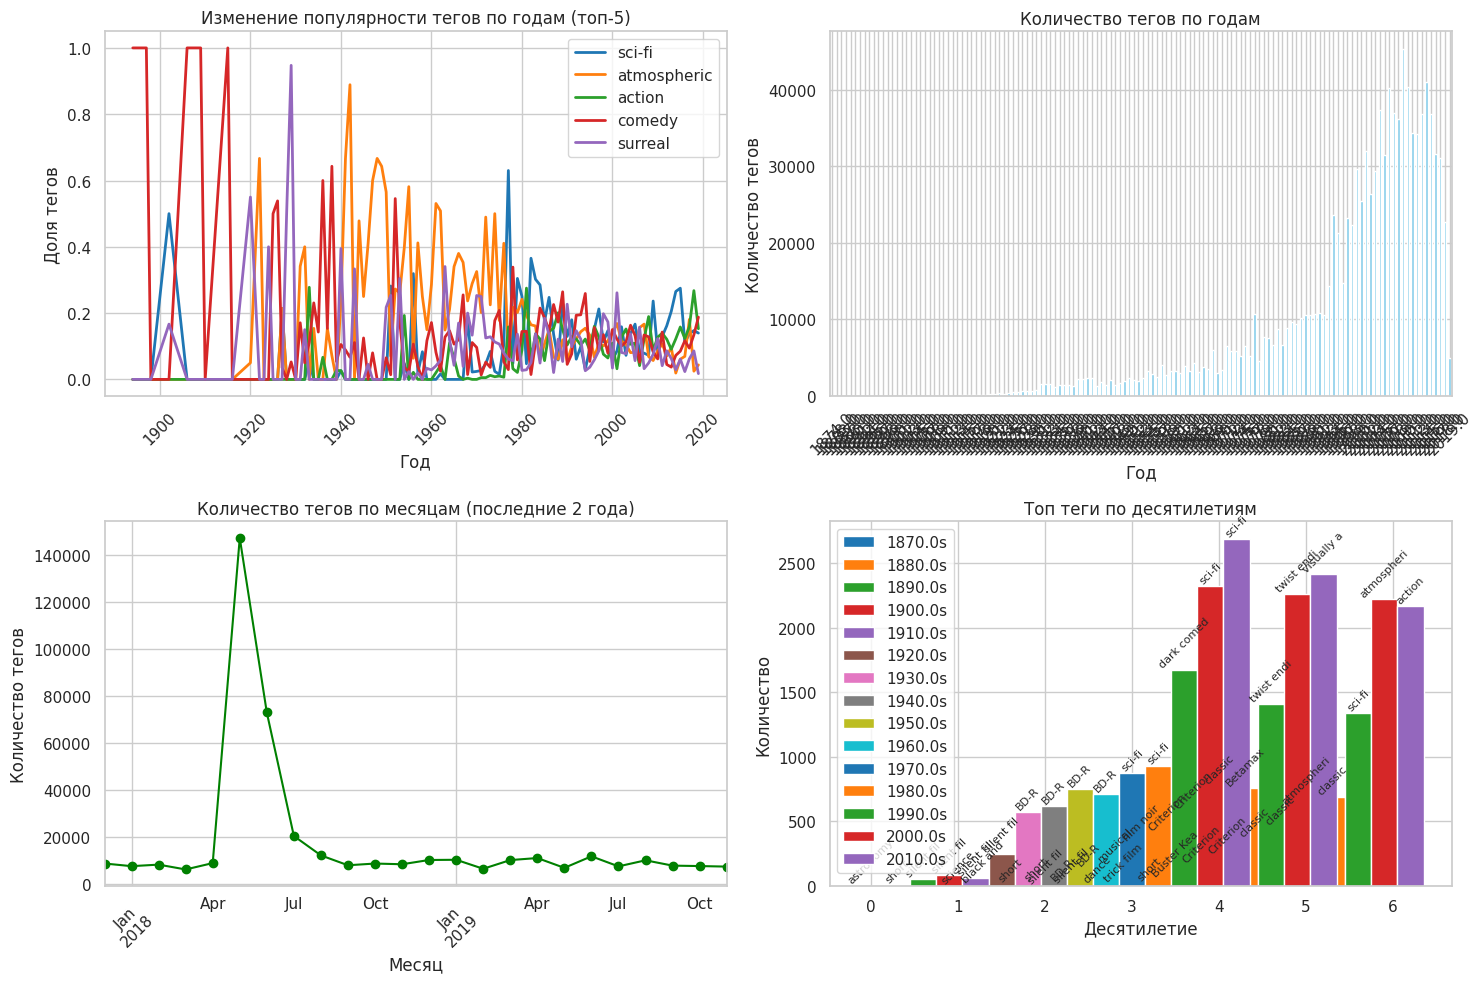

Запуск кластеризации...

2.2 Кластеризация тегов и фильмов:
A. Кластеризация тегов:
Размер матрицы тегов: (500, 7128)
Silhouette Score для кластеризации тегов: 0.0145

Топ теги по кластерам:
Кластер 0: ['1970s', '80s', 'absurd', 'action', 'action packed']
Кластер 1: ['great cinematography']
Кластер 2: ['interracial romance']
Кластер 3: ['awesome']
Кластер 4: ['stylish']
Кластер 5: ['fashion']

B. Кластеризация фильмов:
Размер матрицы фильмов: (1000, 1128)
Silhouette Score для кластеризации фильмов: 0.0429


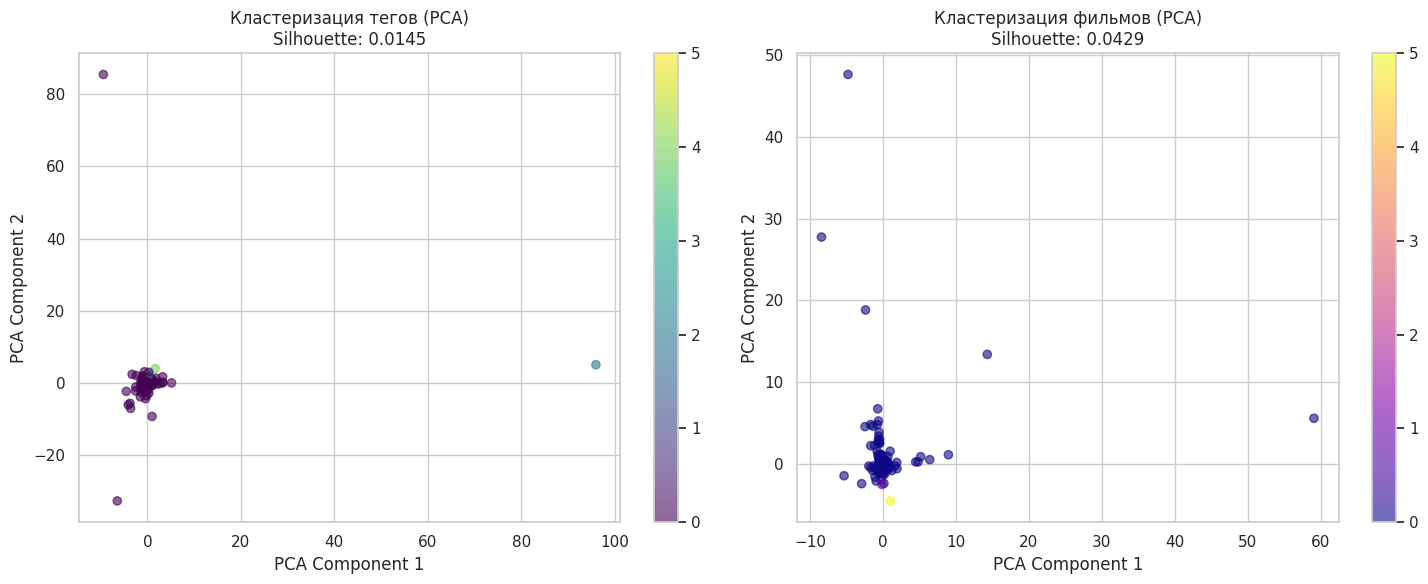


Распределение жанров по кластерам фильмов:


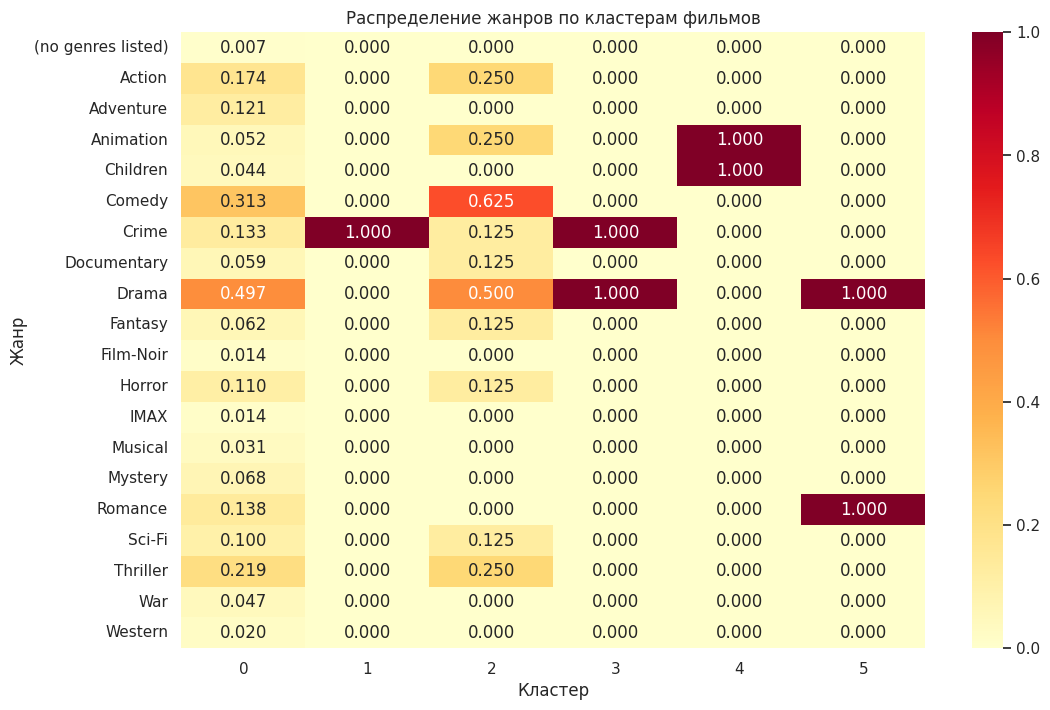

Запуск расчета статистик...

2.3 Статистики по тегам, жанрам, годам:
A. Статистики по тегам:
B. Статистики по жанрам:
C. Статистики по годам:
D. Расчет средних рейтингов по жанрам...


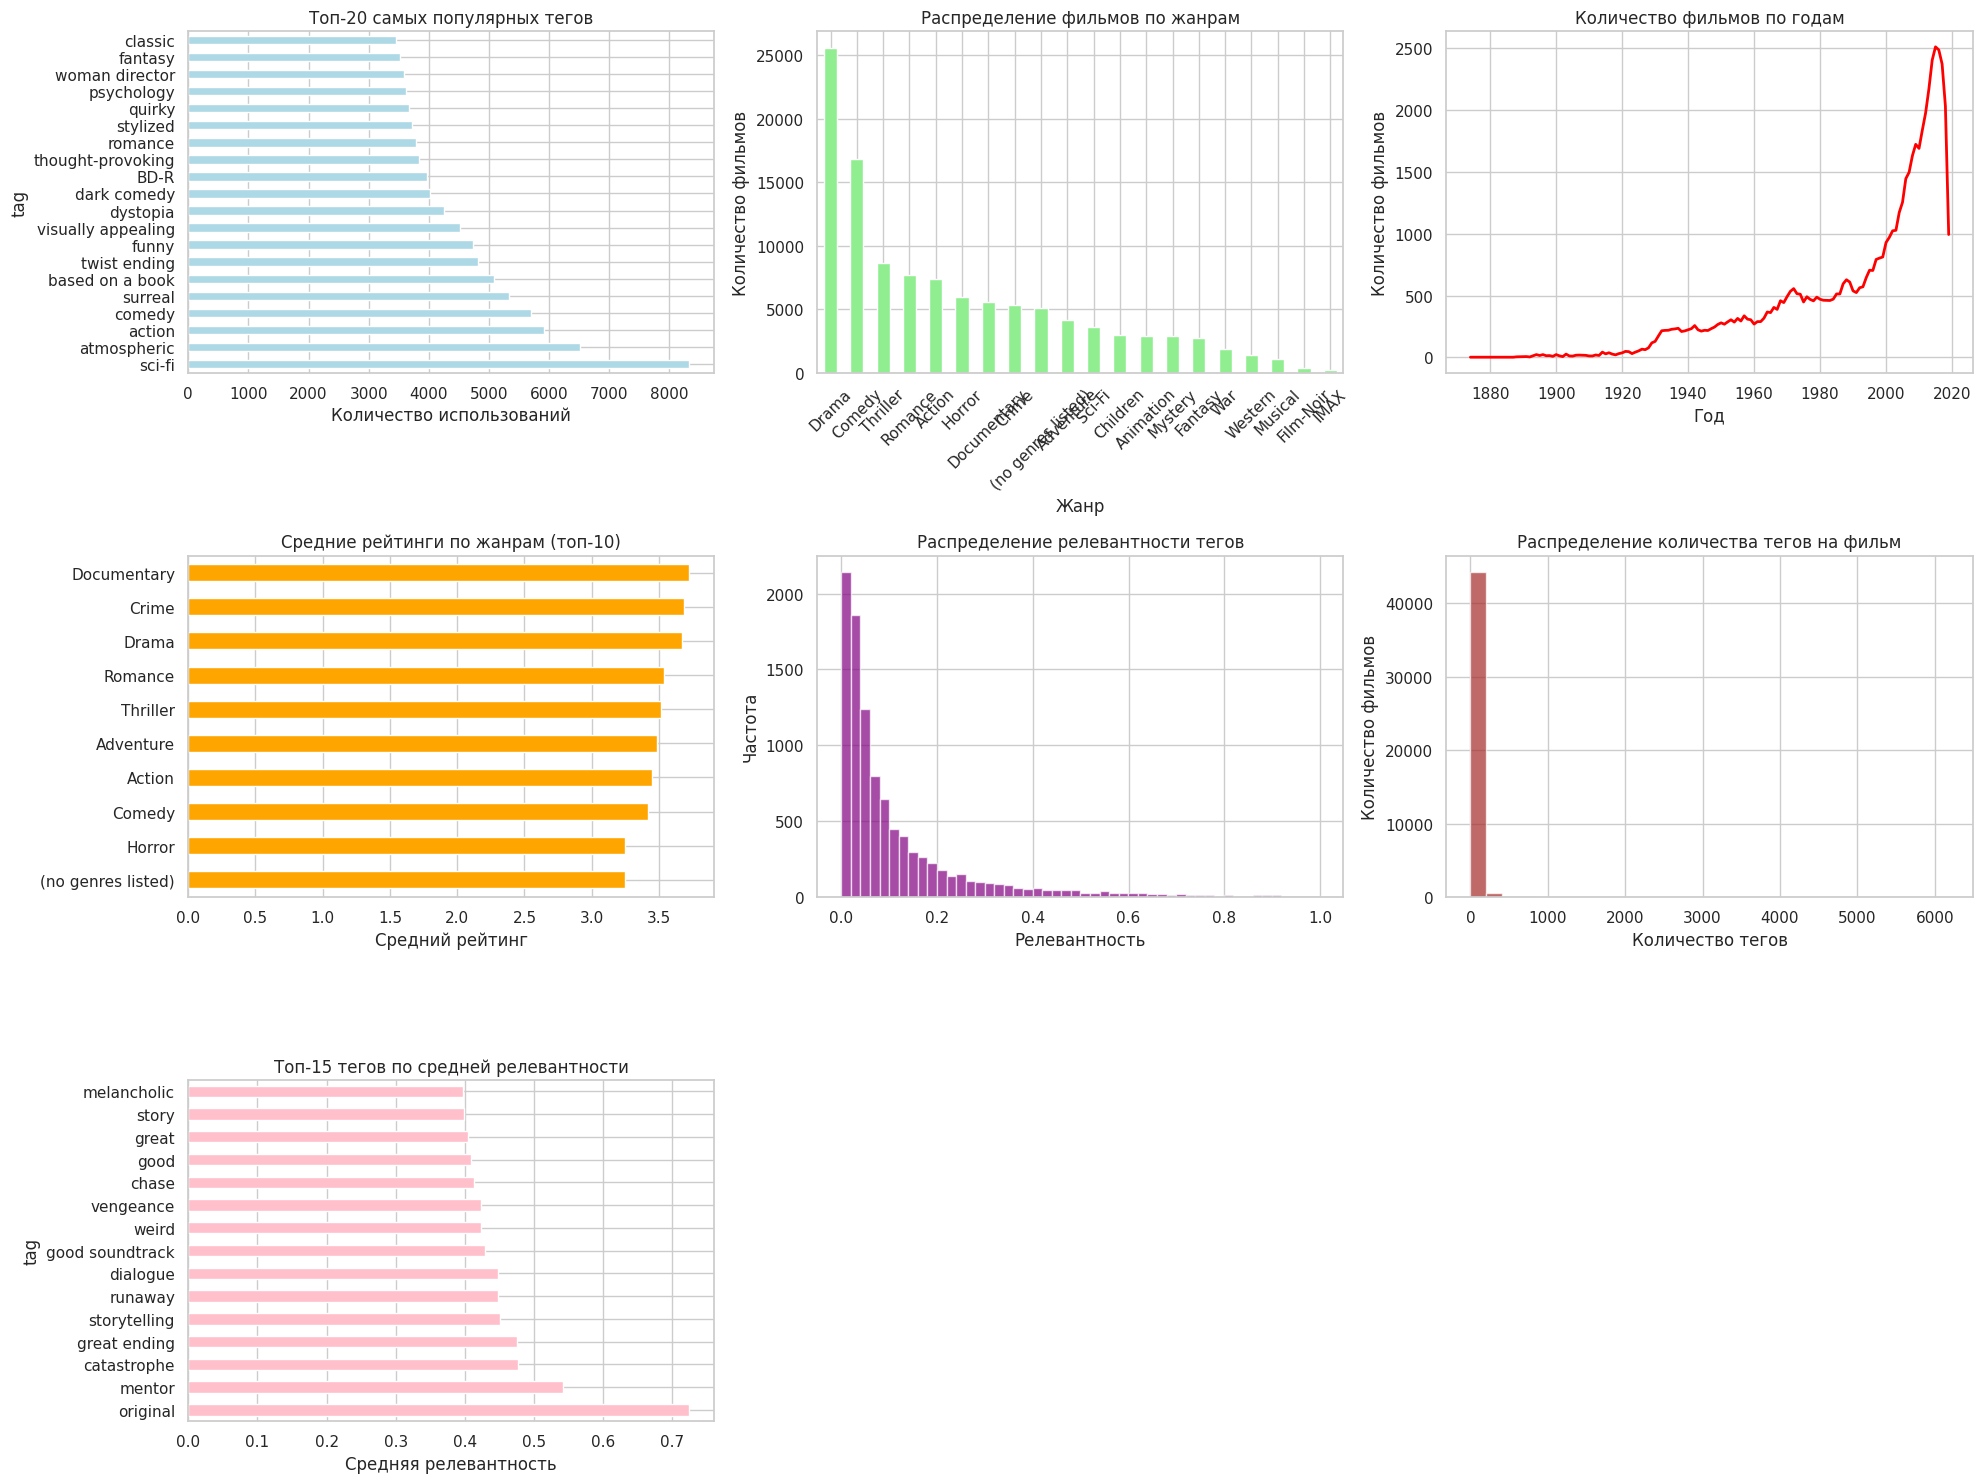


Общая статистика:
Всего фильмов: 62423
Всего оценок: 9328896
Всего тегов: 1093360
Всего уникальных тегов: 73050
Средний рейтинг: 3.53
Медианный рейтинг: 3.50

EDA анализ завершен!


In [ ]:
# Загрузка всех необходимых данных для второго задания
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("Загрузка данных...")

# Загружаем все необходимые файлы
try:
    movies = pd.read_csv("movies.csv")
    rating = pd.read_csv("ratings.csv")
    tags = pd.read_csv("tags.csv")  # Это та переменная, которой не хватало!
    genome_scores = pd.read_csv('genome-scores.csv')
    genome_tags = pd.read_csv('genome-tags.csv')
    links = pd.read_csv('links.csv')

    print("Данные успешно загружены:")
    print(f"movies: {movies.shape}")
    print(f"rating: {rating.shape}")
    print(f"tags: {tags.shape}")
    print(f"genome_scores: {genome_scores.shape}")
    print(f"genome_tags: {genome_tags.shape}")
    print(f"links: {links.shape}")

except FileNotFoundError as e:
    print(f"Ошибка загрузки файлов: {e}")
    print("Убедитесь, что все файлы находятся в текущей директории")
    # Создаем пустые DataFrame чтобы избежать дальнейших ошибок
    movies = pd.DataFrame()
    rating = pd.DataFrame()
    tags = pd.DataFrame()
    genome_scores = pd.DataFrame()
    genome_tags = pd.DataFrame()
    links = pd.DataFrame()

# Задание 2: Полный EDA анализ

## 2.1 Анализ популярности тегов со временем

def analyze_tags_over_time(tags, movies, rating):
    """Анализ популярности тегов по годам"""

    # Проверяем, что данные загружены
    if tags.empty or movies.empty:
        print("Данные не загружены. Пропускаем анализ.")
        return pd.DataFrame()

    print("Начинаем анализ тегов по времени...")

    # Объединяем теги с информацией о фильмах
    tags_with_movies = tags.merge(movies[['movieId', 'title']], on='movieId', how='left')

    # Добавляем год из названия фильма
    tags_with_movies['year'] = tags_with_movies['title'].str.extract(r'\((\d{4})\)')
    tags_with_movies['year'] = pd.to_numeric(tags_with_movies['year'], errors='coerce')

    # Преобразуем timestamp в дату
    tags_with_movies['date'] = pd.to_datetime(tags_with_movies['timestamp'], unit='s')
    tags_with_movies['year_month'] = tags_with_movies['date'].dt.to_period('M')

    # Убираем пропуски
    tags_with_movies = tags_with_movies.dropna(subset=['year'])

    print("Топ-20 самых популярных тегов:")
    top_tags = tags_with_movies['tag'].value_counts().head(20)
    print(top_tags)

    # Визуализация популярности тегов по годам
    plt.figure(figsize=(15, 10))

    # Топ-10 тегов для анализа
    top_10_tags = tags_with_movies['tag'].value_counts().head(10).index

    # Создаем сводную таблицу по годам и тегам
    yearly_tags = tags_with_movies[tags_with_movies['tag'].isin(top_10_tags)]
    yearly_tags_pivot = yearly_tags.pivot_table(
        index='year',
        columns='tag',
        values='timestamp',
        aggfunc='count',
        fill_value=0
    )

    # Нормализуем по годам
    yearly_tags_normalized = yearly_tags_pivot.div(yearly_tags_pivot.sum(axis=1), axis=0)

    # График популярности тегов по годам
    plt.subplot(2, 2, 1)
    for tag in top_10_tags[:5]:  # Берем топ-5 для читаемости
        if tag in yearly_tags_normalized.columns:
            plt.plot(yearly_tags_normalized.index, yearly_tags_normalized[tag], label=tag, linewidth=2)
    plt.title('Изменение популярности тегов по годам (топ-5)')
    plt.xlabel('Год')
    plt.ylabel('Доля тегов')
    plt.legend()
    plt.xticks(rotation=45)

    # Количество тегов по годам
    plt.subplot(2, 2, 2)
    tags_per_year = tags_with_movies.groupby('year').size()
    tags_per_year.plot(kind='bar', color='skyblue')
    plt.title('Количество тегов по годам')
    plt.xlabel('Год')
    plt.ylabel('Количество тегов')
    plt.xticks(rotation=45)

    # Распределение тегов по месяцам
    plt.subplot(2, 2, 3)
    tags_per_month = tags_with_movies.groupby('year_month').size().tail(24)  # Последние 2 года
    tags_per_month.plot(kind='line', marker='o', color='green')
    plt.title('Количество тегов по месяцам (последние 2 года)')
    plt.xlabel('Месяц')
    plt.ylabel('Количество тегов')
    plt.xticks(rotation=45)

    # Топ теги по десятилетиям
    plt.subplot(2, 2, 4)
    tags_with_movies['decade'] = (tags_with_movies['year'] // 10) * 10
    decade_tags = tags_with_movies.groupby(['decade', 'tag']).size().reset_index(name='count')
    top_decade_tags = decade_tags.groupby('decade').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

    # Визуализация
    decades = top_decade_tags['decade'].unique()
    for i, decade in enumerate(decades):
        decade_data = top_decade_tags[top_decade_tags['decade'] == decade]
        positions = np.arange(len(decade_data)) + i * 0.3
        plt.bar(positions, decade_data['count'], width=0.3, label=f'{decade}s')

        for j, (_, row) in enumerate(decade_data.iterrows()):
            plt.text(positions[j], row['count'] + 5, row['tag'][:10],
                    ha='center', va='bottom', rotation=45, fontsize=8)

    plt.title('Топ теги по десятилетиям')
    plt.xlabel('Десятилетие')
    plt.ylabel('Количество')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return tags_with_movies

# Запуск анализа тегов по времени
print("2.1 Анализ популярности тегов со временем:")
tags_with_time = analyze_tags_over_time(tags, movies, rating)

## 2.2 Кластеризация тегов и фильмов

def cluster_tags_and_movies(genome_scores, genome_tags, movies, n_clusters=5):
    """Кластеризация тегов и фильмов"""

    # Проверяем, что данные загружены
    if genome_scores.empty or genome_tags.empty or movies.empty:
        print("Данные не загружены. Пропускаем кластеризацию.")
        return None, None, None

    print("\n2.2 Кластеризация тегов и фильмов:")

    # A. Кластеризация тегов
    print("A. Кластеризация тегов:")

    # Создаем матрицу тег-фильм (ограничиваем размер для скорости)
    sample_genome = genome_scores.sample(min(10000, len(genome_scores)), random_state=42)
    tag_movie_matrix = sample_genome.pivot(index='tagId', columns='movieId', values='relevance').fillna(0)

    # Если матрица слишком большая, берем только топ теги
    if tag_movie_matrix.shape[0] > 500:
        tag_counts = sample_genome.groupby('tagId')['relevance'].sum()
        top_tags = tag_counts.nlargest(500).index
        tag_movie_matrix = tag_movie_matrix.loc[top_tags]

    print(f"Размер матрицы тегов: {tag_movie_matrix.shape}")

    # Стандартизация
    scaler = StandardScaler()
    tags_scaled = scaler.fit_transform(tag_movie_matrix)

    # Кластеризация K-means
    kmeans_tags = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    tag_clusters = kmeans_tags.fit_predict(tags_scaled)

    # Оценка качества кластеризации
    silhouette_tags = silhouette_score(tags_scaled, tag_clusters)
    print(f"Silhouette Score для кластеризации тегов: {silhouette_tags:.4f}")

    # Визуализация кластеров тегов
    pca = PCA(n_components=2)
    tags_pca = pca.fit_transform(tags_scaled)

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    scatter = plt.scatter(tags_pca[:, 0], tags_pca[:, 1], c=tag_clusters, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)
    plt.title(f'Кластеризация тегов (PCA)\nSilhouette: {silhouette_tags:.4f}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

    # Анализ центроидов кластеров тегов
    tag_movie_matrix_reset = tag_movie_matrix.reset_index()
    tag_movie_matrix_reset['cluster'] = tag_clusters

    print("\nТоп теги по кластерам:")
    for cluster_id in range(n_clusters):
        cluster_tags = tag_movie_matrix_reset[tag_movie_matrix_reset['cluster'] == cluster_id]
        cluster_tag_ids = cluster_tags['tagId'].tolist()

        cluster_tag_names = genome_tags[genome_tags['tagId'].isin(cluster_tag_ids)]['tag'].tolist()
        print(f"Кластер {cluster_id}: {cluster_tag_names[:5]}")  # Показываем первые 5 тегов

    # B. Кластеризация фильмов
    print("\nB. Кластеризация фильмов:")

    # Создаем матрицу фильм-тег (ограничиваем размер)
    sample_genome_movies = genome_scores.sample(min(15000, len(genome_scores)), random_state=42)
    movie_tag_matrix = sample_genome_movies.pivot(index='movieId', columns='tagId', values='relevance').fillna(0)

    # Если матрица слишком большая, берем только топ фильмы
    if movie_tag_matrix.shape[0] > 1000:
        movie_counts = sample_genome_movies.groupby('movieId')['relevance'].sum()
        top_movies = movie_counts.nlargest(1000).index
        movie_tag_matrix = movie_tag_matrix.loc[top_movies]

    print(f"Размер матрицы фильмов: {movie_tag_matrix.shape}")

    # Стандартизация
    movies_scaled = scaler.fit_transform(movie_tag_matrix)

    # Кластеризация фильмов
    kmeans_movies = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    movie_clusters = kmeans_movies.fit_predict(movies_scaled)

    # Оценка качества
    silhouette_movies = silhouette_score(movies_scaled, movie_clusters)
    print(f"Silhouette Score для кластеризации фильмов: {silhouette_movies:.4f}")

    # Визуализация кластеров фильмов
    pca_movies = PCA(n_components=2)
    movies_pca = pca_movies.fit_transform(movies_scaled)

    plt.subplot(1, 2, 2)
    scatter = plt.scatter(movies_pca[:, 0], movies_pca[:, 1], c=movie_clusters, cmap='plasma', alpha=0.6)
    plt.colorbar(scatter)
    plt.title(f'Кластеризация фильмов (PCA)\nSilhouette: {silhouette_movies:.4f}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

    plt.tight_layout()
    plt.show()

    # Анализ жанров по кластерам фильмов
    movie_clusters_df = pd.DataFrame({
        'movieId': movie_tag_matrix.index,
        'cluster': movie_clusters
    })

    movies_with_clusters = movies.merge(movie_clusters_df, on='movieId')

    # Анализ жанров в кластерах
    print("\nРаспределение жанров по кластерам фильмов:")
    genres_expanded = movies_with_clusters['genres'].str.get_dummies('|')
    genres_with_clusters = pd.concat([movies_with_clusters['cluster'], genres_expanded], axis=1)

    cluster_genres = genres_with_clusters.groupby('cluster').mean()

    plt.figure(figsize=(12, 8))
    sns.heatmap(cluster_genres.T, annot=True, cmap='YlOrRd', fmt='.3f')
    plt.title('Распределение жанров по кластерам фильмов')
    plt.xlabel('Кластер')
    plt.ylabel('Жанр')
    plt.show()

    return tag_clusters, movie_clusters, movies_with_clusters

# Запуск кластеризации
print("Запуск кластеризации...")
tag_clusters, movie_clusters, movies_with_clusters = cluster_tags_and_movies(
    genome_scores, genome_tags, movies, n_clusters=6
)

## 2.3 Статистики по тегам, жанрам, годам

def calculate_statistics(movies, rating, tags, genome_scores):
    """Расчет и визуализация статистик"""

    # Проверяем, что данные загружены
    if movies.empty or rating.empty or tags.empty:
        print("Данные не загружены. Пропускаем статистики.")
        return

    print("\n2.3 Статистики по тегам, жанрам, годам:")

    plt.figure(figsize=(20, 15))

    # A. Статистики по тегам
    print("A. Статистики по тегам:")
    tag_stats = tags['tag'].value_counts()

    plt.subplot(3, 3, 1)
    tag_stats.head(20).plot(kind='barh', color='lightblue')
    plt.title('Топ-20 самых популярных тегов')
    plt.xlabel('Количество использований')

    # B. Статистики по жанрам
    print("B. Статистики по жанрам:")
    # Создаем копию чтобы избежать предупреждений
    movies_copy = movies.copy()
    genres_expanded = movies_copy['genres'].str.get_dummies('|')
    genre_counts = genres_expanded.sum().sort_values(ascending=False)

    plt.subplot(3, 3, 2)
    genre_counts.plot(kind='bar', color='lightgreen')
    plt.title('Распределение фильмов по жанрам')
    plt.xlabel('Жанр')
    plt.ylabel('Количество фильмов')
    plt.xticks(rotation=45)

    # C. Статистики по годам
    print("C. Статистики по годам:")
    movies_copy['year'] = movies_copy['title'].str.extract(r'\((\d{4})\)')
    movies_copy['year'] = pd.to_numeric(movies_copy['year'], errors='coerce')
    year_counts = movies_copy['year'].value_counts().sort_index()

    plt.subplot(3, 3, 3)
    year_counts.plot(kind='line', color='red', linewidth=2)
    plt.title('Количество фильмов по годам')
    plt.xlabel('Год')
    plt.ylabel('Количество фильмов')

    # D. Средние рейтинги по жанрам (ограничиваем данные для скорости)
    print("D. Расчет средних рейтингов по жанрам...")
    rating_sample = rating.sample(min(100000, len(rating)), random_state=42)
    data_with_genres = rating_sample.merge(movies_copy[['movieId', 'genres']], on='movieId')

    if not data_with_genres.empty:
        genres_dummies = data_with_genres['genres'].str.get_dummies('|')
        rating_with_genres = pd.concat([data_with_genres['rating'], genres_dummies], axis=1)

        genre_avg_ratings = {}
        for genre in genre_counts.index[:10]:  # Топ-10 жанров
            if genre in rating_with_genres.columns:
                genre_ratings = rating_with_genres[rating_with_genres[genre] == 1]['rating']
                if len(genre_ratings) > 0:
                    genre_avg_ratings[genre] = genre_ratings.mean()

        plt.subplot(3, 3, 4)
        pd.Series(genre_avg_ratings).sort_values().plot(kind='barh', color='orange')
        plt.title('Средние рейтинги по жанрам (топ-10)')
        plt.xlabel('Средний рейтинг')

    # E. Распределение релевантности тегов
    plt.subplot(3, 3, 5)
    genome_scores_sample = genome_scores.sample(min(10000, len(genome_scores)), random_state=42)
    genome_scores_sample['relevance'].hist(bins=50, color='purple', alpha=0.7)
    plt.title('Распределение релевантности тегов')
    plt.xlabel('Релевантность')
    plt.ylabel('Частота')

    # F. Количество тегов на фильм
    tags_per_movie = tags.groupby('movieId')['tag'].count()
    plt.subplot(3, 3, 6)
    tags_per_movie.hist(bins=30, color='brown', alpha=0.7)
    plt.title('Распределение количества тегов на фильм')
    plt.xlabel('Количество тегов')
    plt.ylabel('Количество фильмов')

    # G. Топ теги по релевантности
    if not genome_scores.empty and not genome_tags.empty:
        tag_relevance = genome_scores.merge(genome_tags, on='tagId')
        top_relevance_tags = tag_relevance.groupby('tag')['relevance'].mean().nlargest(15)

        plt.subplot(3, 3, 7)
        top_relevance_tags.plot(kind='barh', color='pink')
        plt.title('Топ-15 тегов по средней релевантности')
        plt.xlabel('Средняя релевантность')

    plt.tight_layout()
    plt.show()

    # Вывод числовых статистик
    print(f"\nОбщая статистика:")
    print(f"Всего фильмов: {len(movies)}")
    print(f"Всего оценок: {len(rating)}")
    print(f"Всего тегов: {len(tags)}")
    print(f"Всего уникальных тегов: {tags['tag'].nunique()}")
    print(f"Средний рейтинг: {rating['rating'].mean():.2f}")
    print(f"Медианный рейтинг: {rating['rating'].median():.2f}")

# Запуск расчета статистик
print("Запуск расчета статистик...")
calculate_statistics(movies, rating, tags, genome_scores)

print("\n" + "="*50)
print("EDA анализ завершен!")
print("="*50)

## Задание 3

Сделайте рекомендацию фильмов на основе контента:
1. Будем считать, что описание фильма состоит из его тегов.
2. Когда пользователь ставит оценку за фильм, ее нужно засчитать как оценку за теги.
3. Рекомендацией будем считать фильмы с тегами, которые пользователь оценил выше всего.



In [ ]:
import pandas as pd
import numpy as np

print("ЗАПУСК МАКСИМАЛЬНО ЛЕГКОГО СКРИПТА")

# 1. ЗАГРУЗКА ТОЛЬКО САМЫХ НЕОБХОДИМЫХ ДАННЫХ
print("Загрузка минимального набора данных...")

# Загружаем только нужные колонки и ограничиваем размер
movies = pd.read_csv("movies.csv", usecols=['movieId', 'title', 'genres']).head(500)
rating = pd.read_csv("ratings.csv", usecols=['userId', 'movieId', 'rating']).head(20000)
genome_scores = pd.read_csv('genome-scores.csv').head(50000)
genome_tags = pd.read_csv('genome-tags.csv')

print("Данные загружены")

# 2. ПРОСТАЯ ФУНКЦИЯ РЕКОМЕНДАЦИЙ
def ultra_light_recommendations(user_id, n_recommendations=5):
    """Сверхлегкая функция рекомендаций"""
    print(f"\nРекомендации для пользователя {user_id}")

    # Фильмы, которые пользователь уже оценил
    user_ratings = rating[rating['userId'] == user_id]
    if user_ratings.empty:
        print("Пользователь не найден")
        return

    watched_movies = user_ratings['movieId'].unique()
    print(f"ользователь оценил {len(watched_movies)} фильмов")

    # Собираем теги и их веса от пользователя
    tag_scores = {}

    for _, rating_row in user_ratings.iterrows():
        movie_id = rating_row['movieId']
        rating_val = rating_row['rating']

        # Находим теги этого фильма
        movie_tags = genome_scores[genome_scores['movieId'] == movie_id]

        for _, tag_row in movie_tags.iterrows():
            tag_id = tag_row['tagId']
            relevance = tag_row['relevance']
            score = rating_val * relevance

            if tag_id in tag_scores:
                tag_scores[tag_id]['total_score'] += score
                tag_scores[tag_id]['count'] += 1
            else:
                tag_scores[tag_id] = {'total_score': score, 'count': 1}

    # Вычисляем средние оценки тегов
    tag_avg_scores = {}
    for tag_id, data in tag_scores.items():
        tag_avg_scores[tag_id] = data['total_score'] / data['count']

    # Берем топ-5 тегов
    top_tags = sorted(tag_avg_scores.items(), key=lambda x: x[1], reverse=True)[:5]

    print("Топ теги пользователя:")
    for tag_id, score in top_tags:
        tag_name = genome_tags[genome_tags['tagId'] == tag_id]['tag'].iloc[0]
        print(f"   {tag_name}: {score:.2f}")

    # Ищем фильмы с этими тегами
    recommendations = {}

    for tag_id, tag_score in top_tags:
        # Фильмы с этим тегом
        movies_with_tag = genome_scores[
            (genome_scores['tagId'] == tag_id) &
            (~genome_scores['movieId'].isin(watched_movies))
        ]

        for _, movie_row in movies_with_tag.iterrows():
            movie_id = movie_row['movieId']
            relevance = movie_row['relevance']
            score = relevance * tag_score

            if movie_id in recommendations:
                recommendations[movie_id] += score
            else:
                recommendations[movie_id] = score

    # Сортируем и берем топ рекомендаций
    top_movies = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:n_recommendations]

    print(f"\n🎬 Топ-{len(top_movies)} рекомендаций:")
    for i, (movie_id, score) in enumerate(top_movies, 1):
        movie_info = movies[movies['movieId'] == movie_id]
        if not movie_info.empty:
            title = movie_info['title'].iloc[0]
            genres = movie_info['genres'].iloc[0]
            print(f"{i}. {title}")
            print(f"   Score: {score:.3f}")
            print(f"   {genres}")
            print()

# 3. ДЕМОНСТРАЦИЯ НА 3 ПОЛЬЗОВАТЕЛЯХ
print("\n" + "="*50)
print("ДЕМОНСТРАЦИЯ РАБОТЫ СИСТЕМЫ")
print("="*50)

# Находим пользователей с достаточным количеством оценок
user_rating_counts = rating['userId'].value_counts()
active_users = user_rating_counts[user_rating_counts >= 5].index[:3]

for user_id in active_users:
    ultra_light_recommendations(user_id, 3)

print("СКРИПТ УСПЕШНО ВЫПОЛНЕН!")

ЗАПУСК МАКСИМАЛЬНО ЛЕГКОГО СКРИПТА
Загрузка минимального набора данных...
Данные загружены

ДЕМОНСТРАЦИЯ РАБОТЫ СИСТЕМЫ

Рекомендации для пользователя 72
ользователь оценил 813 фильмов
Топ теги пользователя:
   original: 2.92
   great acting: 2.36
   great: 2.24
   mentor: 2.22
   great ending: 2.18

🎬 Топ-3 рекомендаций:
1. Toy Story (1995)
   Score: 8.365
   Adventure|Animation|Children|Comedy|Fantasy

2. Dead Man Walking (1995)
   Score: 8.234
   Crime|Drama

3. Othello (1995)
   Score: 7.962
   Drama


Рекомендации для пользователя 12
ользователь оценил 736 фильмов
Топ теги пользователя:
   original: 2.25
   mentor: 1.73
   great: 1.70
   good: 1.70
   good soundtrack: 1.67

🎬 Топ-3 рекомендаций:
1. Heat (1995)
   Score: 6.778
   Action|Crime|Thriller

2. Mortal Kombat (1995)
   Score: 5.896
   Action|Adventure|Fantasy

3. Restoration (1995)
   Score: 5.576
   Drama


Рекомендации для пользователя 3
ользователь оценил 656 фильмов
Топ теги пользователя:
   original: 3.93
   imdb top

## Доп. задание
Сделайте неперсонализированную рекомендацию фильма по имеющимся данным. Можно, например, найти фильм с самой высокой средней оценкой по каждому жанру или за какой-то период.

In [ ]:
import pandas as pd
import numpy as np

# Загрузка данных
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Преобразование жанров в список
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

# Создание DataFrame с оценками и жанрами
ratings_with_genres = ratings.merge(movies[['movieId', 'title', 'genres']], on='movieId')

# Вспомогательная функция для разбивки жанров
def explode_genres(df):
    df_exploded = df.explode('genres')
    return df_exploded

# 1. Фильм с самой высокой средней оценкой по каждому жанру
ratings_exploded = explode_genres(ratings_with_genres)
genre_avg_rating = ratings_exploded.groupby(['genres', 'movieId', 'title'])['rating'].agg(['mean', 'count']).reset_index()
# Убираем жанр "(no genres listed)"
genre_avg_rating = genre_avg_rating[genre_avg_rating['genres'] != '(no genres listed)']

# Для каждого жанра берём фильм с наибольшим средним рейтингом (при условии минимум 10 оценок)
top_movies_by_genre = genre_avg_rating[genre_avg_rating['count'] >= 10].sort_values(['genres', 'mean'], ascending=[True, False])
top_movies_by_genre = top_movies_by_genre.drop_duplicates('genres', keep='first')[['genres', 'title', 'mean', 'count']]

print("Топ-1 фильм по каждому жанру (мин. 10 оценок):")
print(top_movies_by_genre.to_string(index=False))

# 2. Фильмы с самой высокой средней оценкой за определённый период
# Преобразуем timestamp в дату
ratings['date'] = pd.to_datetime(ratings['timestamp'], unit='s')
# Выберем период, например, с 2010 по 2015 год
start_date = pd.Timestamp('2010-01-01')
end_date = pd.Timestamp('2015-12-31')
ratings_period = ratings[(ratings['date'] >= start_date) & (ratings['date'] <= end_date)]

# Средний рейтинг за период
period_avg = ratings_period.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
period_avg = period_avg[period_avg['count'] >= 20]  # фильтр по минимальному количеству оценок
period_avg = period_avg.merge(movies[['movieId', 'title']], on='movieId')
period_top = period_avg.sort_values('mean', ascending=False).head(10)

print("\nТоп-10 фильмов за период 2010-2015 (мин. 20 оценок):")
print(period_top[['title', 'mean', 'count']].to_string(index=False))

# 3. Популярные фильмы (по количеству оценок)
popular_movies = ratings.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
popular_movies = popular_movies.merge(movies[['movieId', 'title']], on='movieId')
popular_movies = popular_movies.sort_values('count', ascending=False).head(10)

print("\nТоп-10 самых популярных фильмов (по количеству оценок):")
print(popular_movies[['title', 'mean', 'count']].to_string(index=False))

Топ-1 фильм по каждому жанру (мин. 10 оценок):
     genres                                        title     mean  count
     Action                      Band of Brothers (2001) 4.416667     36
  Adventure                         Interstate 60 (2002) 4.314815     27
  Animation                   Hedgehog in the Fog (1975) 4.409091     11
   Children My Neighbor Totoro (Tonari no Totoro) (1988) 4.219565    230
     Comedy                              Parasite (2019) 4.363636     11
      Crime              Decalogue, The (Dekalog) (1989) 4.700000     10
Documentary                        Civil War, The (1990) 4.545455     11
      Drama              Decalogue, The (Dekalog) (1989) 4.700000     10
    Fantasy                         Interstate 60 (2002) 4.314815     27
  Film-Noir                      Double Indemnity (1944) 4.281250    128
     Horror             Silence of the Lambs, The (1991) 4.121798   1913
       IMAX                             Inception (2010) 4.164234    959
    